### Importar bibliotecas

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### Sobre o dataset

Esse arquivo foi coletado do UCI Machine Learning Repository (Asuncion and Newman, 2007).
Fonte: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

Identificação dos atributos:
ID - Identificador  
Clump - Espessura da massa  
UnifSize - Uniformidade do tamanho da célula  
UnifShape - Uniformidade da forma da célula  
MargAdh - Adesão marginal  
SingEpiSize - Tamanho da célula epitelial única  
BareNuc - Núcleos puros  
BlandChrom - Cromatina branda  
NormNucl - Nucléolos normais  
Mit - Mitose  
Class - Benigno ou maligno [2 - benigno / 4 - maligno]

### Carregar arquivo csv com os dados

In [3]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

### Fazer análise exploratória

In [88]:
# Verificar se os tipos das variáveis estão coerentes
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [90]:
# Observamos que a variável BareNuc está como texto, devido a um valor missing indicado por '?'
df['BareNuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [96]:
# Selecionamos apenas as variáveis numéricas
df = df[df['BareNuc'].str.isnumeric()]

# Transformamos o restante dos dados em inteiros
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [97]:
df_mean_gr = df.groupby('Class').mean().iloc[:,1:]
df_mean_gr

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
Class,,,,,,,,,
2,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
4,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


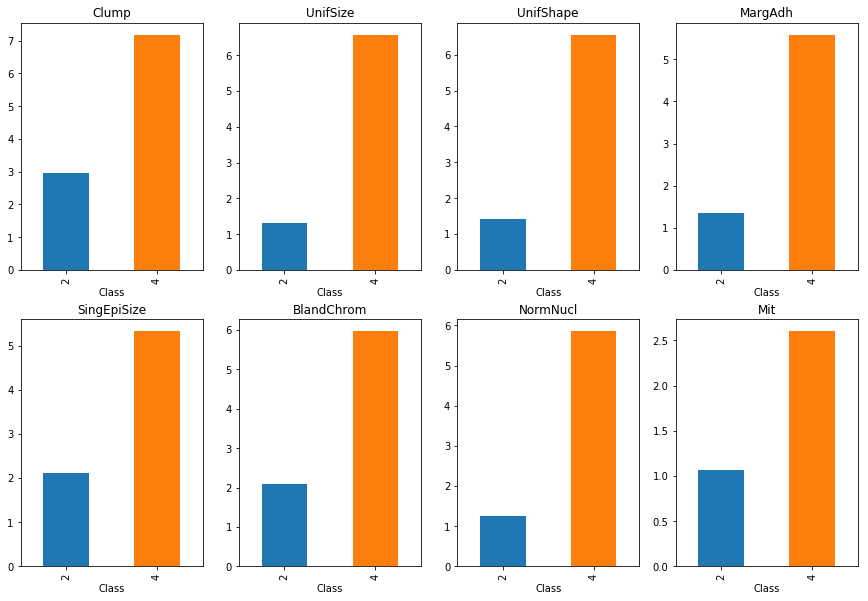

In [98]:
colunas = ['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BlandChrom','NormNucl','Mit']

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)
ax8 = fig.add_subplot(2,4,8)

eixos = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for col,eix in zip(colunas,eixos):
    df_mean_gr[col].plot(kind='bar',ax=eix)
    eix.title.set_text(col)

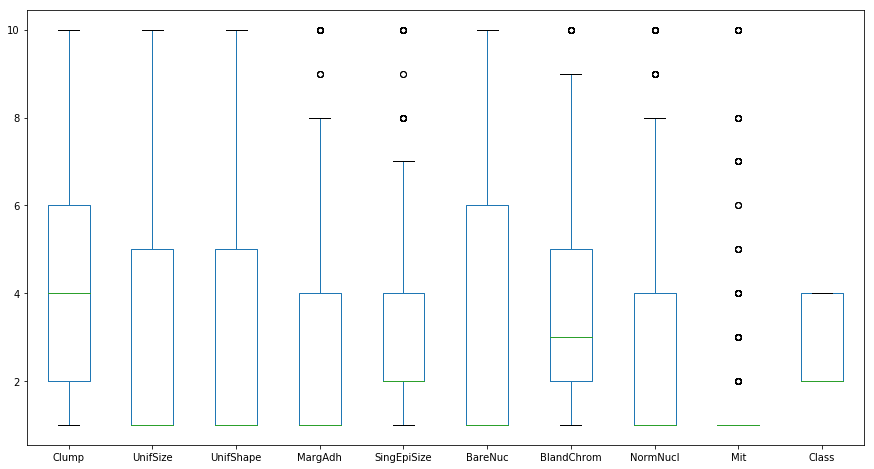

In [99]:
df.iloc[:,1:].plot(kind='box',figsize=(15,8))

### Dividir variáveis preditoras e target

In [104]:
# Variáveis preditoras: foram retiradas a variável target 'Class' e a variável 'ID', por não possuir relevância.
X = np.asarray(df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BlandChrom','NormNucl','Mit']])

# Variável target: 'Class'
Y = np.asarray(df['Class'])

### Dividir o dataset entre treino e teste

In [106]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

### Criar modelo de classificação - Support Vector Machines (Classifier)

In [109]:
model = SVC(kernel='linear',C=2,gamma='auto')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Avaliação do modelo inicial

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          2       0.95      0.95      0.95        82
          4       0.93      0.93      0.93        55

avg / total       0.94      0.94      0.94       137



In [114]:
print(confusion_matrix(y_test,y_pred))

[[78  4]
 [ 4 51]]


In [118]:
print(accuracy_score(y_test,y_pred))

0.9416058394160584


In [127]:
from sklearn.model_selection import GridSearchCV 
model1 = GridSearchCV(SVC(),param_grid={'kernel':['linear','rbf','sigmoid'],
                                        'C':[0.01,0.1,0.5,1,2]})
model1.fit(x_train,y_train)
model1.best_estimator_

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [128]:
model1.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [132]:
model2 = SVC(C=0.5,kernel='linear')
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

In [134]:
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,model2.predict(x_test)))

             precision    recall  f1-score   support

          2       0.94      0.95      0.95        82
          4       0.93      0.91      0.92        55

avg / total       0.93      0.93      0.93       137

0.9343065693430657


### Conclusão

Foi observado que o melhor modelo SVM para esse dataset é utilizando os parâmetros kernel='linear' e C=2, contrariando o calculado pelo GridSearchCV.